# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats



# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [6]:
# Load data
df = pd.read_csv('../data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [7]:
# 1. Print the number of duplicate rows we have in our dataframe.

df.duplicated().sum()


np.int64(720)

In [8]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
print(df.shape)


(11194, 15)


In [9]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
df.duplicated().sum()


np.int64(0)

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [10]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()
nulls = df.isnull().sum()
nulls.idxmax()
df = df.dropna()
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [11]:
# * Print how long our dataframe is.
df.shape

(11092, 15)

In [12]:
# * Remove any row that has a null value in it. 
df = df.dropna()


In [13]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

df.shape

(11092, 15)

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

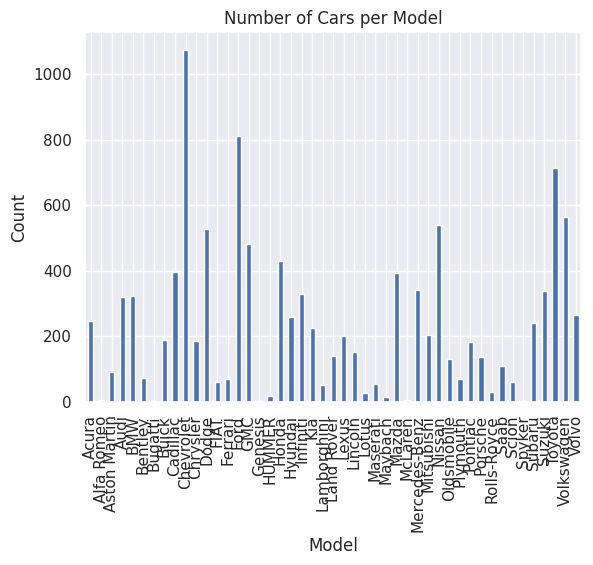

In [14]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

#df.value_counts()

amts = df.groupby('Make').size()
amts.plot(kind='bar')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Number of Cars per Model')
plt.show()

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

In [15]:
df.groupby('Make').size()

Make
Acura             246
Alfa Romeo          5
Aston Martin       91
Audi              321
BMW               324
Bentley            74
Bugatti             3
Buick             190
Cadillac          396
Chevrolet        1075
Chrysler          187
Dodge             528
FIAT               59
Ferrari            68
Ford              811
GMC               482
Genesis             3
HUMMER             17
Honda             431
Hyundai           259
Infiniti          328
Kia               224
Lamborghini        52
Land Rover        139
Lexus             202
Lincoln           152
Lotus              28
Maserati           55
Maybach            16
Mazda             392
McLaren             5
Mercedes-Benz     340
Mitsubishi        205
Nissan            541
Oldsmobile        132
Plymouth           71
Pontiac           181
Porsche           136
Rolls-Royce        31
Saab              109
Scion              60
Spyker              2
Subaru            239
Suzuki            339
Toyota            713
Volks

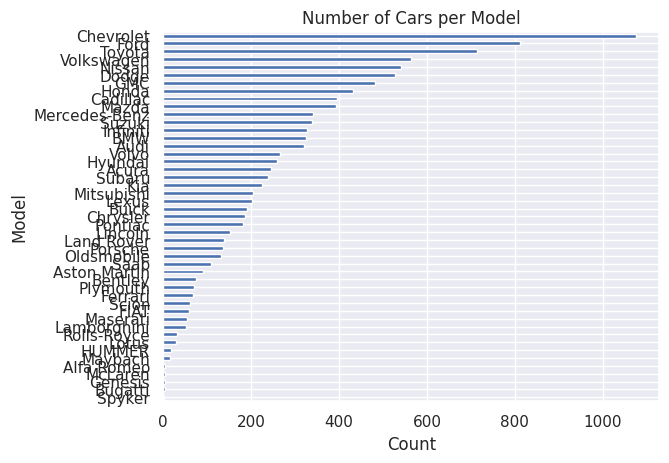

In [16]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
counts = df.groupby('Make').size().sort_values(ascending = True)

g = counts.plot(kind = 'barh')

plt.xlabel('Count')
plt.ylabel('Model')
plt.title('Number of Cars per Model')


plt.show()





# Make a timeline line chart in which the x-axis is the Year, and the y-axis is the mean MSRP.
* you're going to have to do a `groupby` for this one for sure. 
* What's noticeable about it and what do you think the error is...


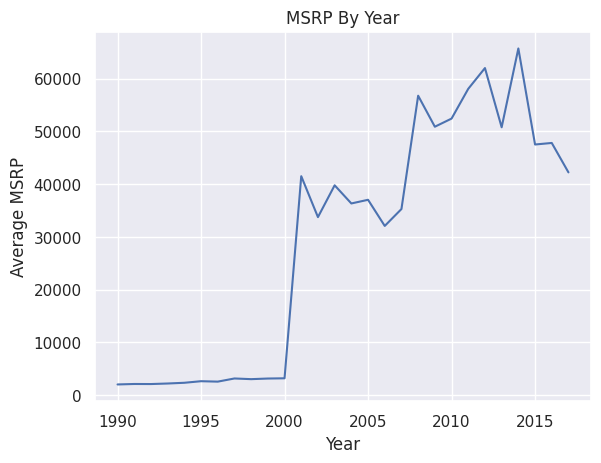

In [17]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
timeline = df.groupby('Year')['MSRP'].agg('mean')
timeline.plot(kind="line")

plt.xlabel('Year')
plt.ylabel('Average MSRP') 
plt.title('MSRP By Year') 
plt.grid(True)

plt.show()

# It seems as though in the years before (and including) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [18]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [19]:
# Make a column where is 10 when year is less than 2000, else 1.
#df['adjusted_price'] = df.where(df['Year'] < 2000, 10, 1)


# Multiply the MSRP by the price adjuster.



# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

In [20]:
# Plot new prices



# Plot the relationship between Engine HP and highway MPG

In [21]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


Engine HP
55.0      41.500000
62.0      44.000000
63.0      37.888889
66.0      27.400000
73.0      31.000000
            ...    
707.0     21.666667
720.0     17.000000
731.0     16.000000
750.0     18.000000
1001.0    14.000000
Name: highway MPG, Length: 355, dtype: float64


/tmp/ipykernel_41017/833655825.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_means = df.groupby('HP_bin')['highway MPG'].mean()


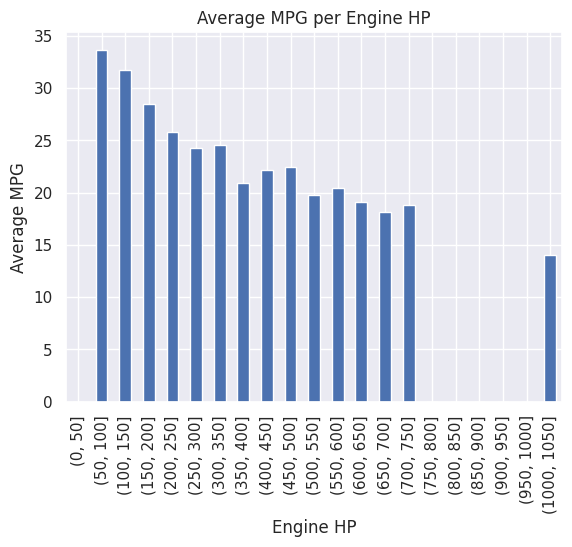

In [22]:
# Plot the relationship between Engine HP and highway MPG
best_pow = df.groupby('Engine HP')['highway MPG'].agg('mean')

print(best_pow)

bins = range(0, int(df['Engine HP'].max()) + 50, 50)
df['HP_bin'] = pd.cut(df['Engine HP'], bins)

binned_means = df.groupby('HP_bin')['highway MPG'].mean()
binned_means.plot(kind='bar')

# best_pow.plot(kind='bar')
plt.xlabel("Engine HP")
plt.ylabel("Average MPG")
plt.title("Average MPG per Engine HP")

plt.show()

In [36]:
### IF WE DIDN'T GET TO REMOVING OUTLIERS IN CLASS, THEN YOU CAN SKIP THIS SECTION
# Remove any outliers from Engine HP and highway MPG 
def remove_outliers(group):
    Q1 = group.quantile(0.25)
    Q3 = group.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group >= lower_bound) & (group <= upper_bound)]

filtered = df.groupby('Engine HP')['highway MPG'].apply(remove_outliers).reset_index()
filtered

,Engine HP,level_1,highway MPG
0,55.0,6794,42
1,55.0,6798,41
2,62.0,2528,44
3,62.0,2533,44
4,63.0,1469,38
...,...,...,...
10641,750.0,1629,18
10642,750.0,1630,18
10643,1001.0,11362,14
10644,1001.0,11363,14


# Replot the relationship between Engine HP and highway MPG


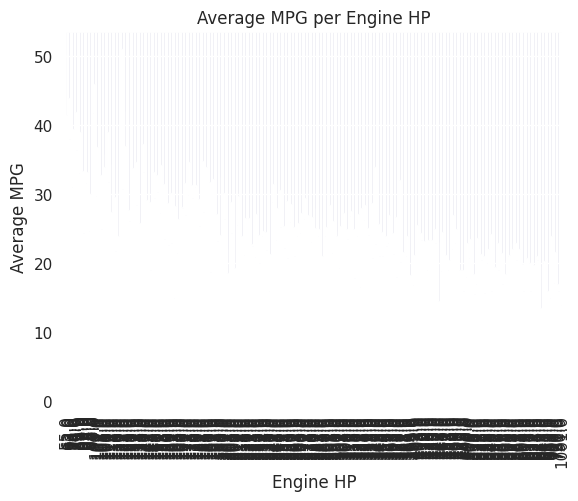

In [40]:
# Re-Plot the relationship between Engine HP and highway MPG
agg_filtered = filtered.groupby('Engine HP')['highway MPG'].mean()

agg_filtered.plot(kind='bar')
plt.xlabel("Engine HP")
plt.ylabel("Average MPG")
plt.title("Average MPG per Engine HP")

plt.show()


# Make a scatter plot of Engine HP vs highway MPG

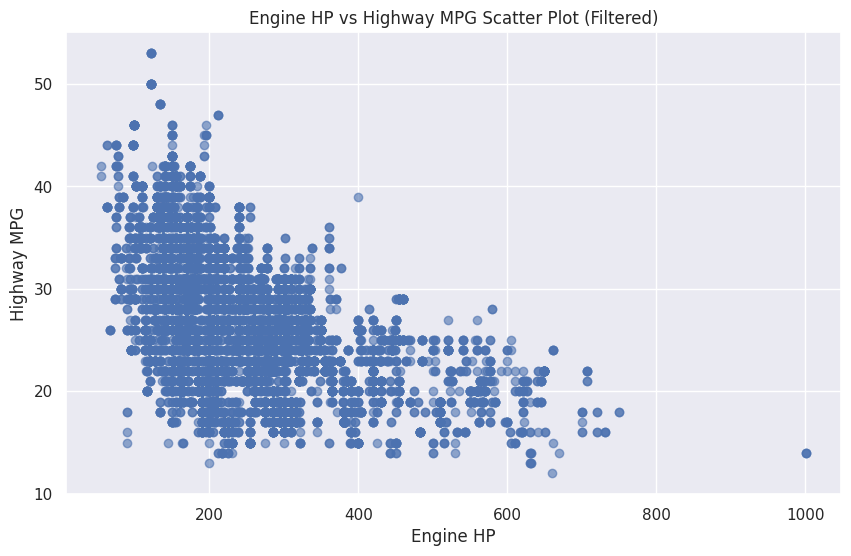

In [43]:
# Make a scatter plot of Engine HP vs highway MPG
plt.figure(figsize=(10, 6))
plt.scatter(filtered['Engine HP'], filtered['highway MPG'], alpha=0.6)
plt.xlabel('Engine HP')
plt.ylabel('Highway MPG')
plt.title('Engine HP vs Highway MPG Scatter Plot (Filtered)')
plt.grid(True)
plt.show()

# plt.scatter(df['Engine HP'], df['highway MPG'])
# plt.xlabel('Engine HP')
# plt.ylabel('Highway MPG')
# plt.title('Engine HP vs Highway MPG Scatter Plot')
# plt.grid(True)
# plt.show()

# What does this plot tell you about how Engine HP affects highway MPG?

In [ ]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('Lower HP correlates with higher MPH')

Your answer here.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

In [30]:
# Using a pairplot, display all of the linear relationship.



In [31]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).



# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

In [32]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8




In [33]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Your answer here')

Your answer here


# [EXTRA CREDIT] 
* (EASY) In the column names, replace all the spaces with an underscore, and make them all lowercase as well.

* (Easy) Learn more about cleaning data by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_1.ipynb`.

* (Medium) Do the same vizualizations using bokeh by following along in TA Stevens tutorial in the TA-Tips folder named `SS-Tips.ipynb`.


* (Medium) Learn how to remove outliers properly by following along in TA Georgios' tutorial in TA-Tips folder named `GI-Tips_2.ipynb`.

* (Variable) Complete one or more of the [Extra-Extra credit](https://docs.google.com/document/d/1D99fY13cF3kzIiJILZ3fwzhOF73z_xPBNxxweMpBkOY/edit) items. 


